In [5]:
import pandas as pd

In [6]:
import plotly.express as px
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.distributions.empirical_distribution import ECDF
import datetime

df = pd.read_csv('data/Sales_Product_Price_by_Store.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['weekly_sales'] = df['Price'] * df['Weekly_Units_Sold']
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

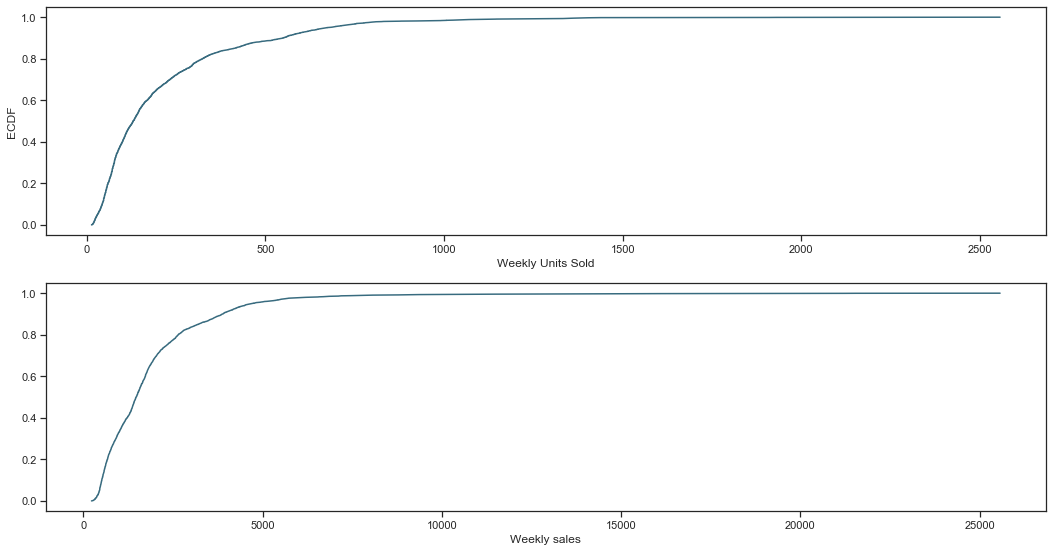

In [16]:
sns.set(style = "ticks")
c = '#386B7F' 
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=2.0)
plt.rcParams['figure.figsize'] = (30,4)
plt.subplot(211)
cdf = ECDF(df['Weekly_Units_Sold'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly Units Sold'); plt.ylabel('ECDF');

plt.subplot(212)
cdf = ECDF(df['weekly_sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly sales');


- Although in the best week, a store sold more than 2500 units, about 80% of the time, weekly units sold did not exceed 500.

- Although the highest weekly sales exceeded 25K dollars, over 90% of the data had weekly sales less than 5K dollars.

In [17]:
df.groupby('Store')['weekly_sales'].describe()

count         mean          std      min      25%      50%      75%  \
Store                                                                        
1      429.0  1789.414172   900.074226   769.65  1208.90  1659.17  1957.20   
2      429.0  2469.447413  1328.162884  1143.48  1579.21  2215.08  2756.55   
3      429.0   670.924009   366.816321   229.77   459.77   619.69   730.78   
4      429.0  3078.462145  1746.147872  1099.45  1818.18  2626.61  3837.51   
5      429.0   588.922984   242.628977   285.87   461.23   519.74   613.53   
6      429.0  2066.705082  1163.284768   890.19  1418.58  1758.40  2156.40   
7      429.0   955.115058   489.084883   389.61   649.35   857.61  1041.51   
8      429.0  1352.094056   811.326288   516.53   846.23  1275.87  1491.51   
10     429.0  4093.407249  3130.087191  1483.65  2462.88  3707.81  4510.47   

            max  
Store            
1       6816.59  
2       9110.00  
3       2650.00  
4      13753.12  
5       2264.97  
6       7936.03  
7       3270.00  
8       6656.67  
10     25570.00

In [21]:
df.describe

<bound method NDFrame.describe of             Store  Product  Is_Holiday  Base Price  Price  Weekly_Units_Sold  \
Date                                                                           
2010-02-05      1        1       False        9.99   7.99                245   
2010-02-12      1        1        True        9.99   7.99                453   
2010-02-19      1        1       False        9.99   7.99                409   
2010-02-26      1        1       False        9.99   7.99                191   
2010-03-05      1        1       False        9.99   9.99                145   
...           ...      ...         ...         ...    ...                ...   
2012-09-28     10        3       False       19.99  19.99                133   
2012-10-05     10        3       False       19.99  19.99                133   
2012-10-12     10        3       False       19.99  19.99                127   
2012-10-19     10        3       False       19.99  19.99                133   
2012-1

In [22]:
df.head(5)

Store  Product  Is_Holiday  Base Price  Price  Weekly_Units_Sold  \
Date                                                                           
2010-02-05      1        1       False        9.99   7.99                245   
2010-02-12      1        1        True        9.99   7.99                453   
2010-02-19      1        1       False        9.99   7.99                409   
2010-02-26      1        1       False        9.99   7.99                191   
2010-03-05      1        1       False        9.99   9.99                145   

            weekly_sales  year  month  day  week_of_year  
Date                                                      
2010-02-05       1957.55  2010      2    5             5  
2010-02-12       3619.47  2010      2   12             6  
2010-02-19       3267.91  2010      2   19             7  
2010-02-26       1526.09  2010      2   26             8  
2010-03-05       1448.55  2010      3    5             9

In [23]:
df.info

<bound method DataFrame.info of             Store  Product  Is_Holiday  Base Price  Price  Weekly_Units_Sold  \
Date                                                                           
2010-02-05      1        1       False        9.99   7.99                245   
2010-02-12      1        1        True        9.99   7.99                453   
2010-02-19      1        1       False        9.99   7.99                409   
2010-02-26      1        1       False        9.99   7.99                191   
2010-03-05      1        1       False        9.99   9.99                145   
...           ...      ...         ...         ...    ...                ...   
2012-09-28     10        3       False       19.99  19.99                133   
2012-10-05     10        3       False       19.99  19.99                133   
2012-10-12     10        3       False       19.99  19.99                127   
2012-10-19     10        3       False       19.99  19.99                133   
2012-10-

In [24]:
df.groupby('Store')['Weekly_Units_Sold'].sum()

Store
1      86699
2     121465
3      31689
4     158718
5      27300
6      97698
7      44027
8      65273
10    200924
Name: Weekly_Units_Sold, dtype: int64

- It is easy to see that Store 10 has the highest average weekly sales among all 9 stores, also Store 10  has the most total weekly units sold.

- And Store 5 has the lowest average weekly sales.

- Apparently, Store 10 is the most selling and crowded one.

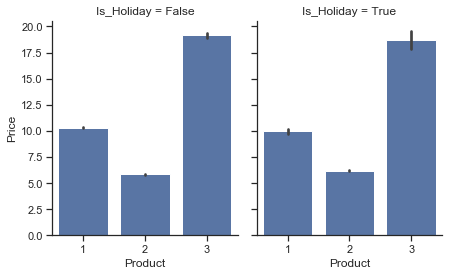

In [39]:
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Price");

In [38]:
g = sns.FacetGrid(df, col='Is_Holiday', height=4, aspect=.8)
g.map(sns.barplot, "Product", "Weekly_Units_Sold");


- Product 2 is the cheapest product among all the three products, and it sells the most.

- Product 3 is the most expensive product among all the three products.

- In addition, product price did not change during holidays.

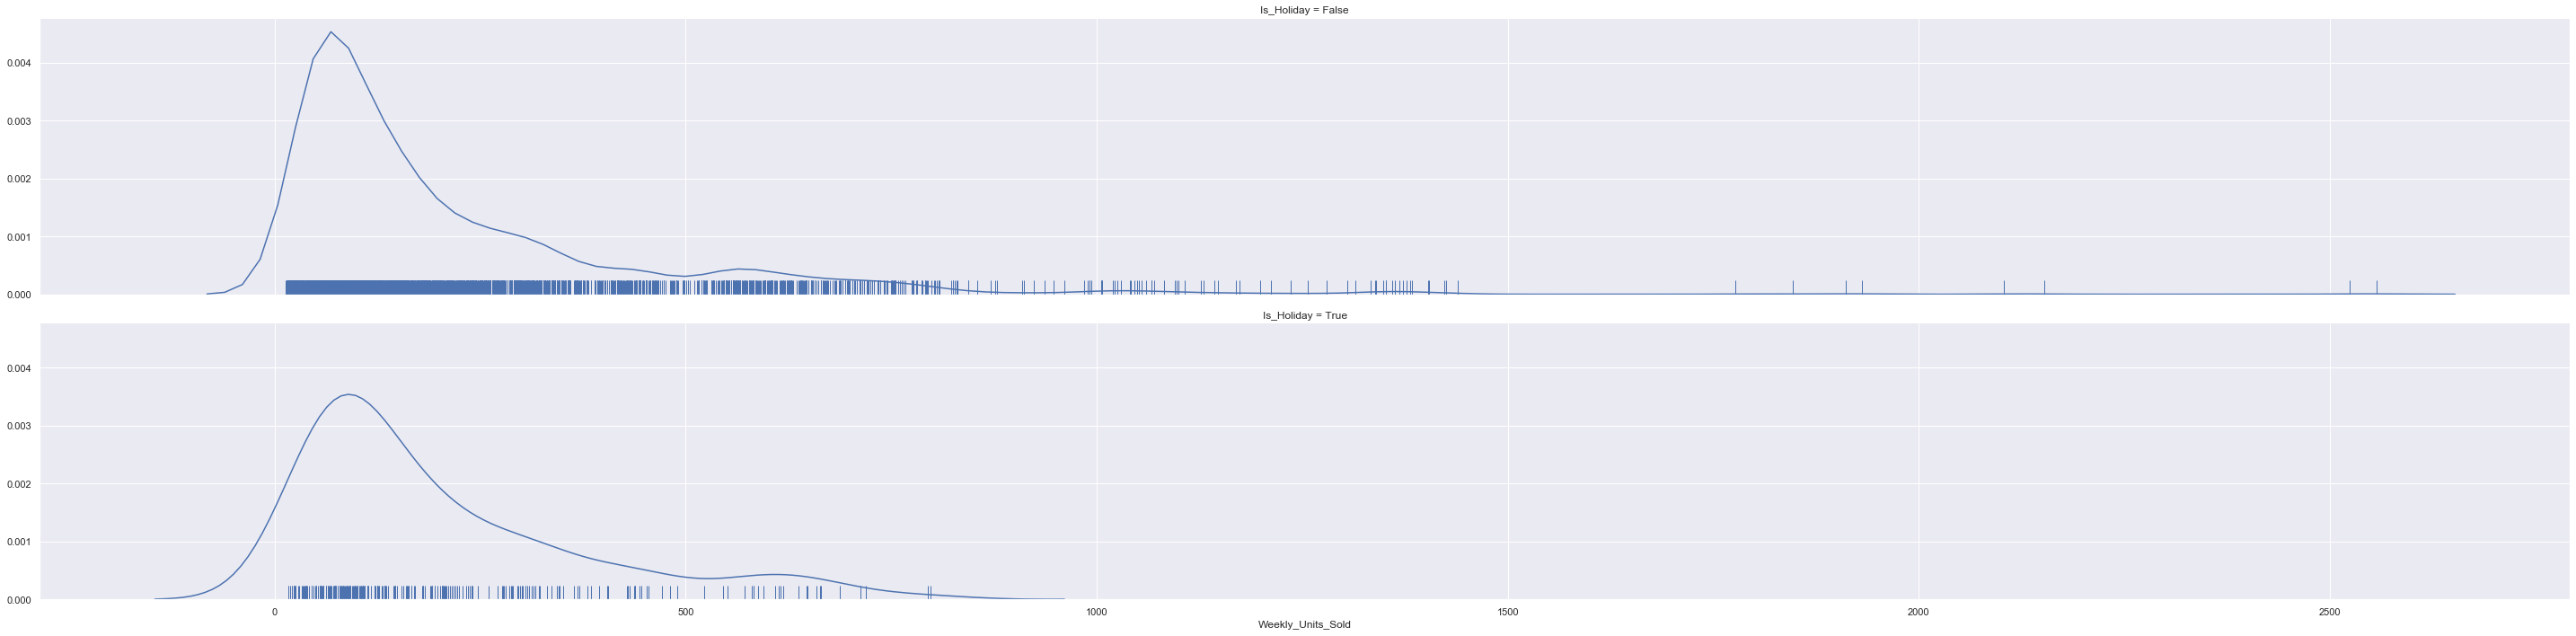

In [48]:
from matplotlib import rcParams
g = sns.FacetGrid(df, row='Is_Holiday',height=5 , aspect=8,) 
g.map(sns.distplot, 'Weekly_Units_Sold', hist=False, rug=True);

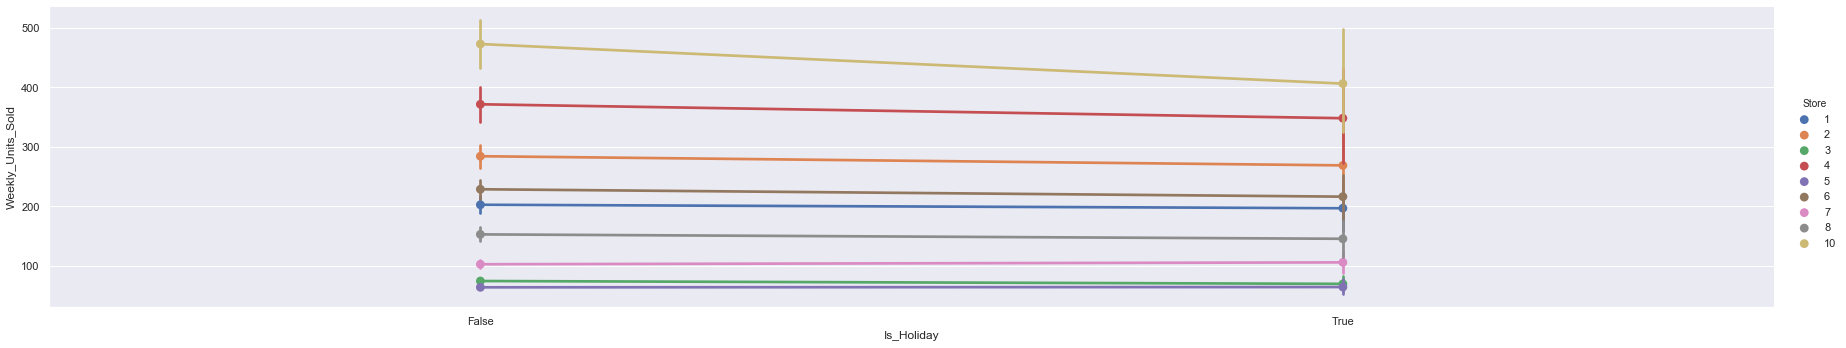

In [50]:
sns.factorplot(data=df, x = 'Is_Holiday', y = 'Weekly_Units_Sold', hue = 'Store', height = 5 , aspect = 5)

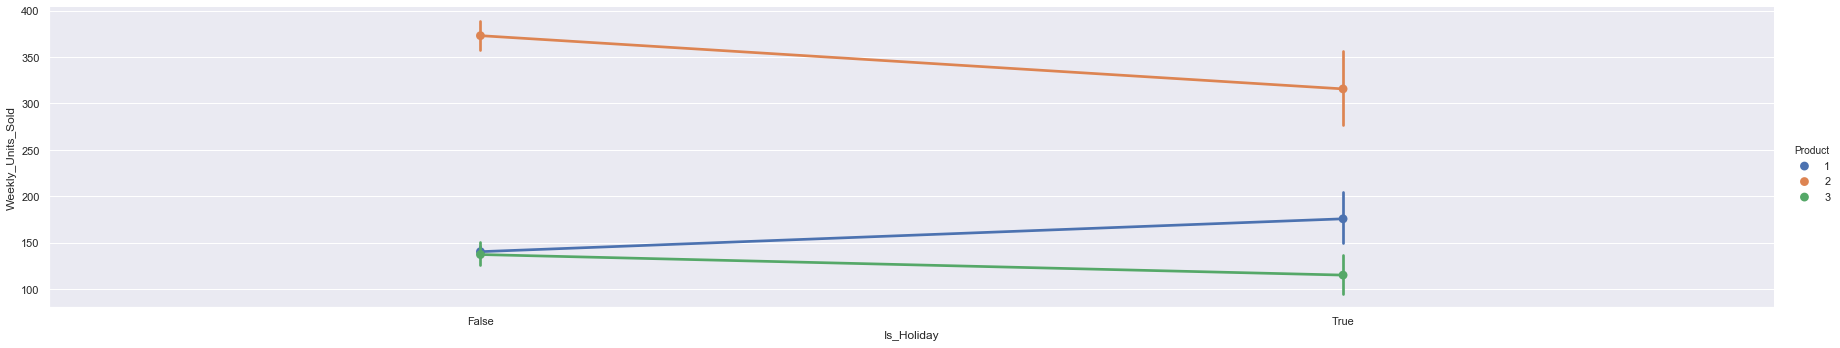

In [51]:
sns.factorplot(data= df, 
               x= 'Is_Holiday',
               y= 'Weekly_Units_Sold',
               hue= 'Product', height = 5 , aspect = 5);

- It does not seem that holidays have a positivt impact for the business. For most of the stores, weekly unit sold during the holiday is as same as the normal days, while store 10 had a decrease during the holidays.

- Weekly units sold for product 1 had a slightly increase during the holidays, while product 2 and product 3 had a decrease during the holidays.

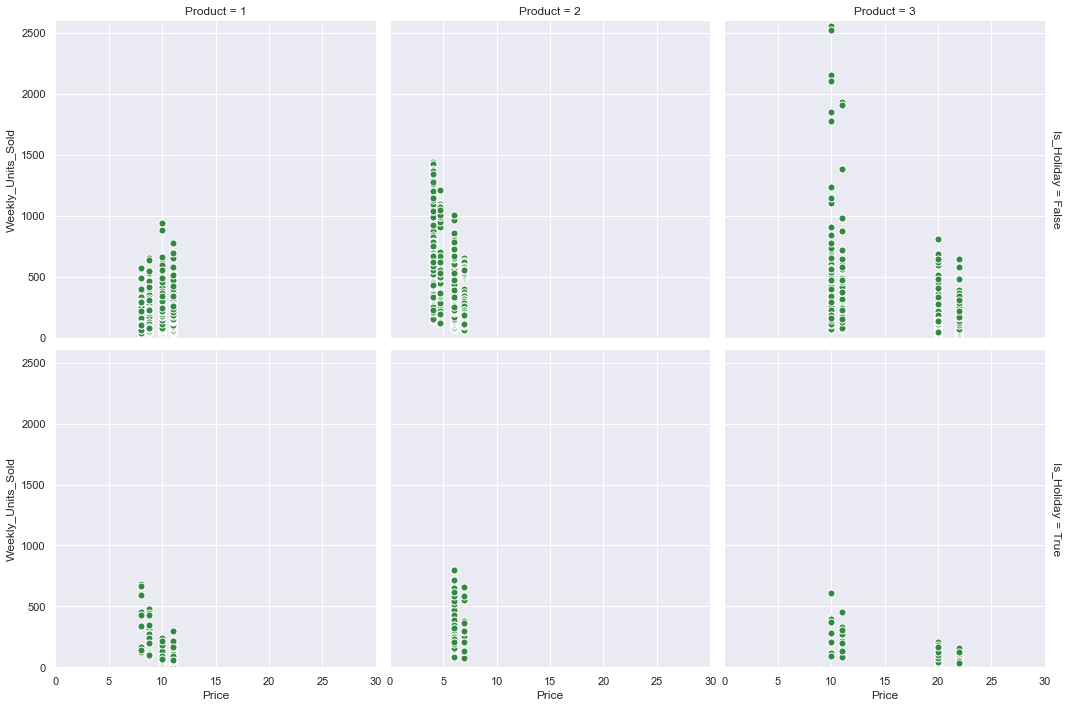

In [52]:
g = sns.FacetGrid(df, col='Product', row='Is_Holiday', margin_titles=True, height = 5)
g.map(plt.scatter, 'Price', 'Weekly_Units_Sold', color='#338844', edgecolor = 'white', s= 50, lw = 1)
g.set(xlim=(0,30), ylim=(0,2600))

- Every product has more than one prices, both at holidays and normal days. I guess one is regular price, another is promotional price.

- The price gap for product 3 is huge, it was slashed to almost 50% off during promotions.

- Product 3 made the most sales during non-holidays.

In [54]:
g = sns.FacetGrid(df, col='Store', hue='Product', margin_titles=True, col_wrap = 3)
g.map(plt.scatter , 'Price', 'Weekly_Units_Sold', alpha=.7)
g.add_legend();

All of these 9 stores carry these 3 products. They all seem to have similar kind of discount promotions. However, product 3 sells the most units during promotions at store 10.

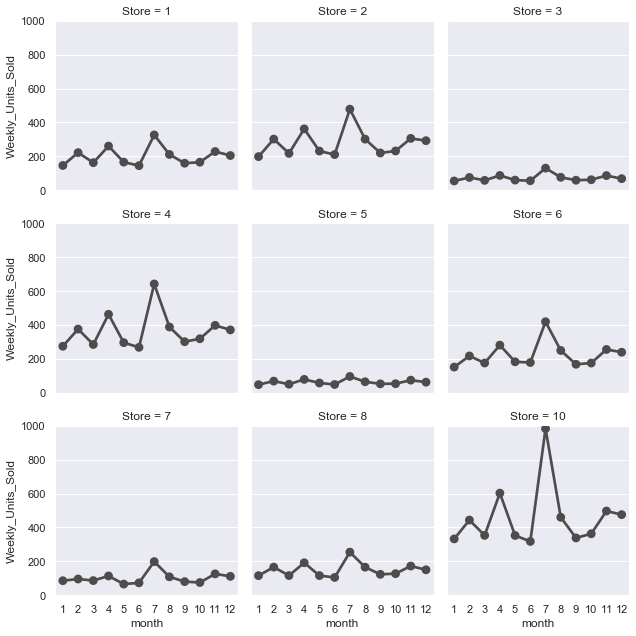

In [58]:
g = sns.FacetGrid(df, col='Store', col_wrap=3, height=3, ylim=(0,1000)) # col_wrap argument -> column count , height = volume parameter
g.map(sns.pointplot, 'month', 'Weekly_Units_Sold', color='.3', ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

Every store has somewhat seasonality, store 10 has the most obvious seasonal pattern.

In [59]:
g = sns.FacetGrid(df, col='Product', col_wrap=3, height=3, ylim=(0,1000))
g.map(sns.pointplot, 'month', 'Weekly_Units_Sold', color='.3', ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12])

Every product has somewhat seasonality, product 2 has two peak seasons per year and product 3 has one.

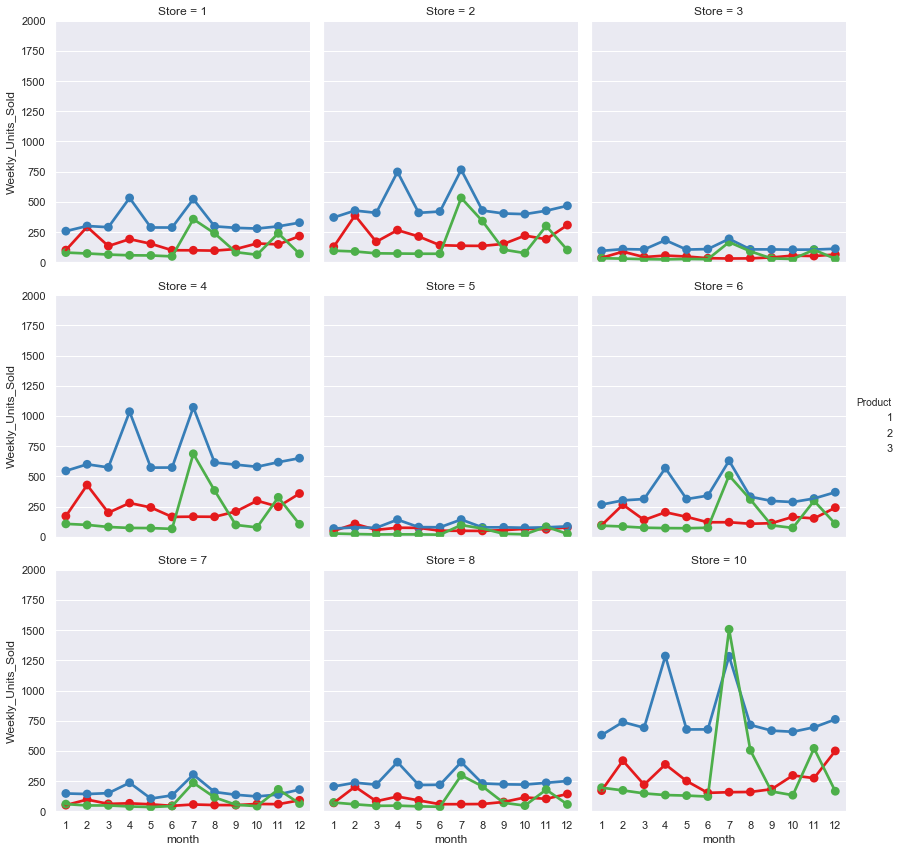

In [63]:
g = sns.FacetGrid(df, col='Store', col_wrap=3, height=4, ylim=(0,2000), hue='Product', palette='Set1')
g.map(sns.pointplot, 'month' , 'Weekly_Units_Sold', ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12], alpha=.7)
g.add_legend();

- In general, product 2 sells more units per week than the other products in every store.

- Once a while , product 3 would exceed product 2 at store 10.

In [68]:
g = sns.PairGrid(df, y_vars=["Weekly_Units_Sold"], x_vars=["Price", "Is_Holiday"], height=5)
g.map(sns.regplot, color=".3");

### Seaborn - Pair Grid. PairGrid allows us to draw a grid of subplots using the same plot type to visualize data. Unlike FacetGrid, it uses different pair of variable for each subplot.

- The cheaper the price, the more weekly units were sold.

- Is holiday or not has nothing to do with the unit sold.

In [69]:
def f(row):
    if row['Base Price'] == row['Price']:
        val = 0
    elif row['Base Price'] > row['Price']:
        val = 1
    else:
        val = -1
    return val
df['promotion'] = df.apply(f, axis=1)

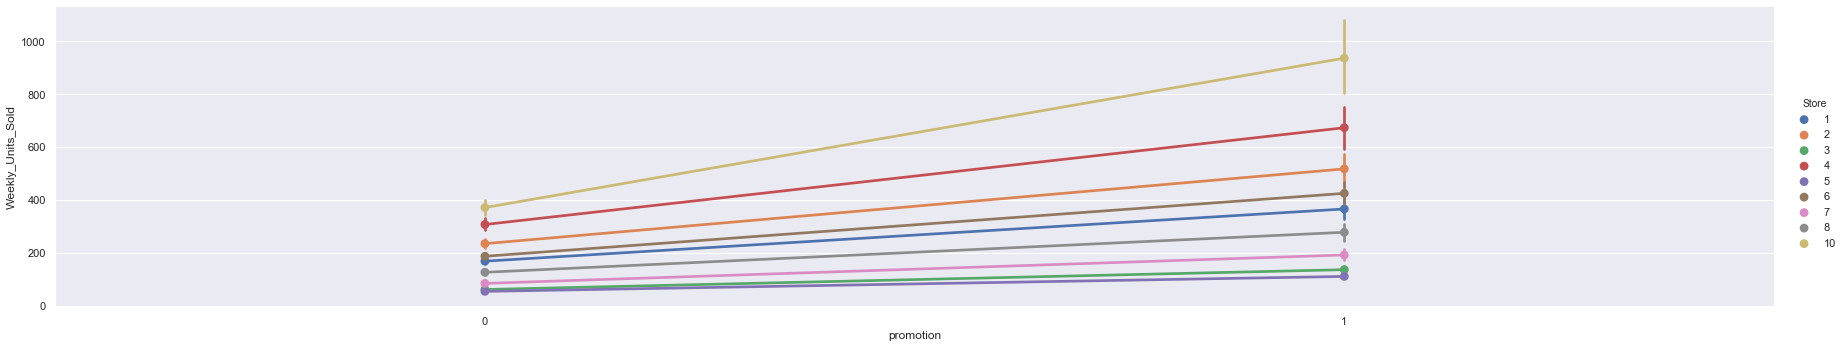

In [72]:
sns.factorplot(data = df, x= 'promotion', y='Weekly_Units_Sold',hue='Store', aspect = 5, height = 5);

Every store sells more during the promotions, there is no exception.

In [74]:
sns.factorplot(data = df, x = 'promotion', y = 'Weekly_Units_Sold', hue= 'Product', aspect =5 , height= 5 )

Every product sells more during the promotions, in particular, product 2 and product 3.

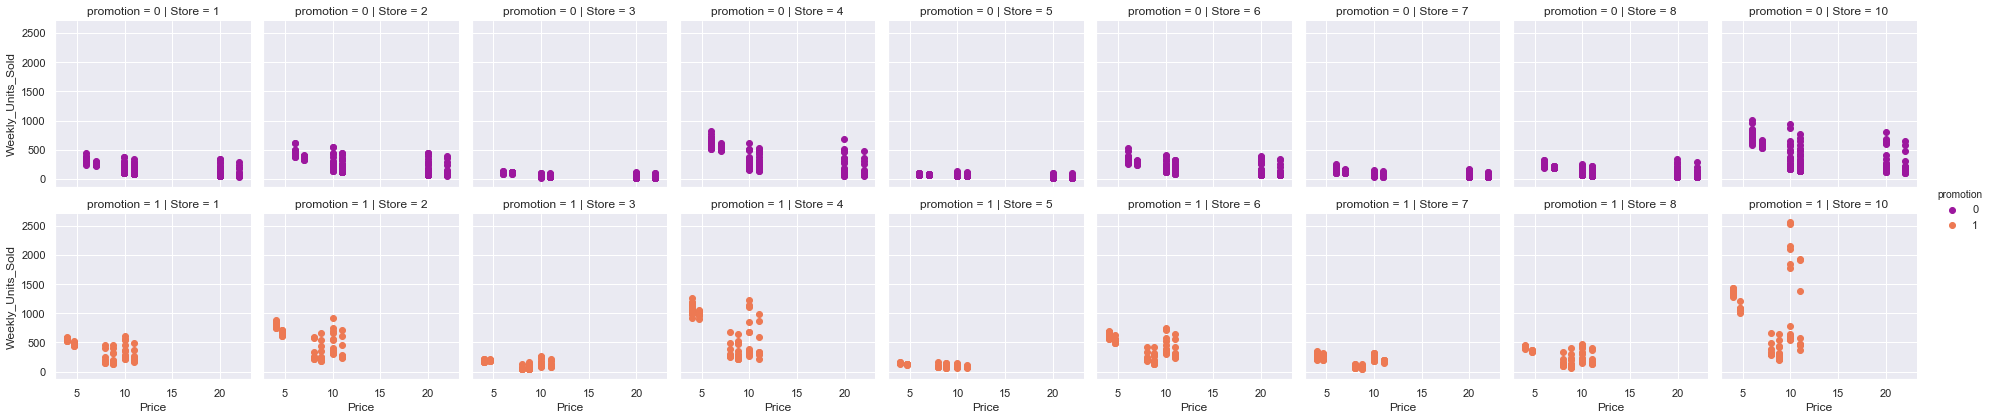

In [75]:
g = sns.FacetGrid(df, col='Store', hue='promotion', palette='plasma', row='promotion')
g = (g.map(plt.scatter, 'Price', 'Weekly_Units_Sold').add_legend())

All the stores have the similar price promotion pattern, for some reason, store 10 sells the most during the promotions.

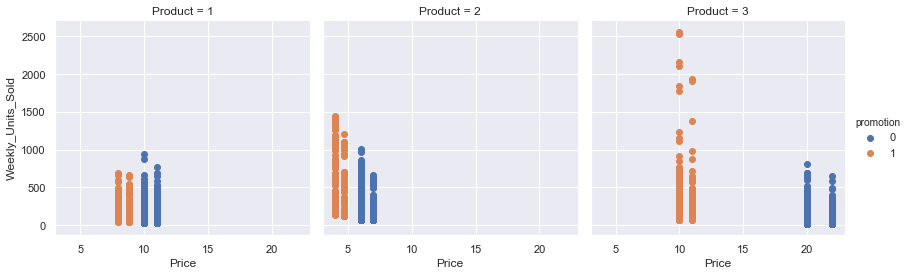

In [80]:
g = sns.FacetGrid(df, hue="promotion", col="Product", height=4)
g.map(plt.scatter, "Price", "Weekly_Units_Sold")
g.add_legend();

Every product has the regular price and promotional price. Product 3 has the highest discount and sells the most during the promotions.

_Observations_

- The most selling and crowded Store is Store 10, and the least crowded store is Store 5.

- In terms of number of units sold, the most selling product is product 2 throughout the year.

- Stores do not necessarily run product promotions during holidays. Holidays do not seem to have an impact on stores or products performance.

- Product 2 seems to be the cheapest product, and Product 3 is the most expensive product.

- Most stores have some kind of seasonality and they have two peak seasons per year.

- Product 1 sells a little more in February than the other months, Product 2 sells the most around April and July, and PRoduct 3 sells the most around July to september.

- Each product has its regular price and promotional price. There isn't significant gap between regular price and promotional price on Product 1 and Product 2, however, Product 3's promotional price can be slashed to 50% of its original price. Although every sotre makes this kind of price cut for product 3 , store 10 is the one made the highest sales during the price cut.

- It is nothing unusual to sell more during promotion than the noraml days. Store 10's made Product 3 the best selling product around July to September.

## Time Series with Prophet
WE are going to build a time series analysis for product 3 at store 10, and we are going to forecast weekly sales in dollars.

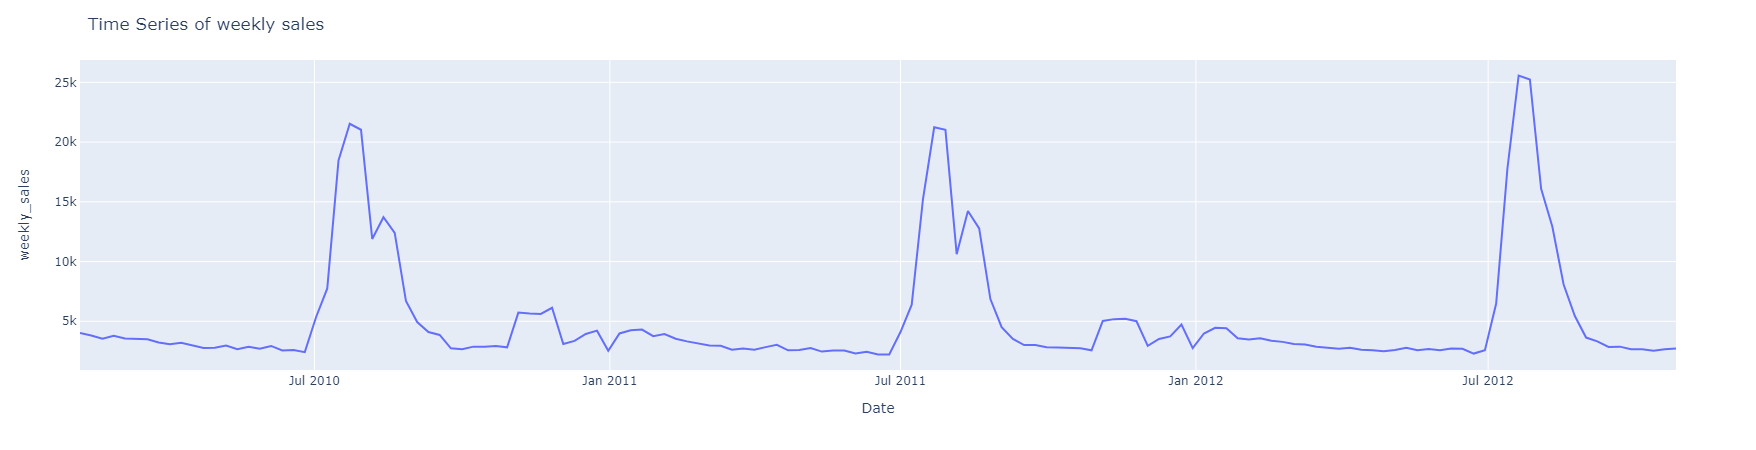

In [81]:
store_10_pro_3 = df[(df.Store == 10) & (df.Product == 3)].loc[:, ['Base Price', 'Price', 'Weekly_Units_Sold', 'weekly_sales']]
store_10_pro_3.reset_index(level=0, inplace=True)
fig = px.line(store_10_pro_3, x='Date', y='weekly_sales')
fig.update_layout(title_text='Time Series of weekly sales')
fig.show()

Product 3's seasonality at store 10 is obvious . The sales always peak between July and September during school holiday.

Bewlow we are implementing __prophet__ model, forecasting the weekly sales for the future 50 weeks.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


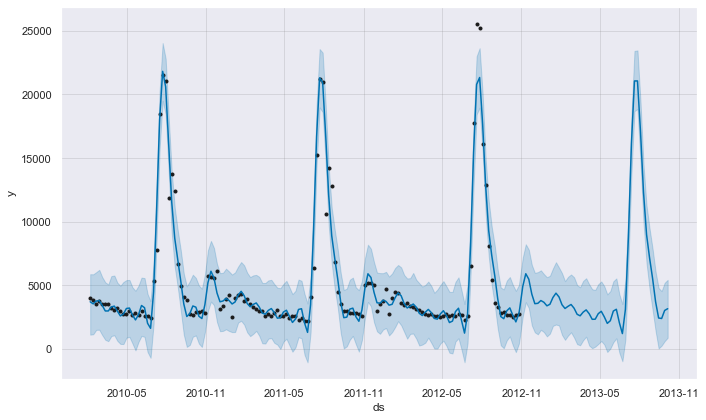

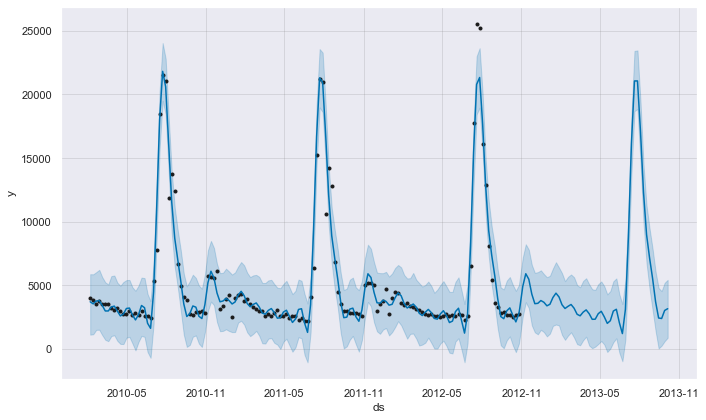

In [82]:
store_10_pro_3 = store_10_pro_3[['Date', 'weekly_sales']].rename(columns = {'Date': 'ds', 'weekly_sales': 'y'})

model = Prophet(interval_width = 0.95)
model.fit(store_10_pro_3)
future_dates = model.make_future_dataframe(periods = 50, freq = 'W')
forecast = model.predict(future_dates)

model.plot(forecast)

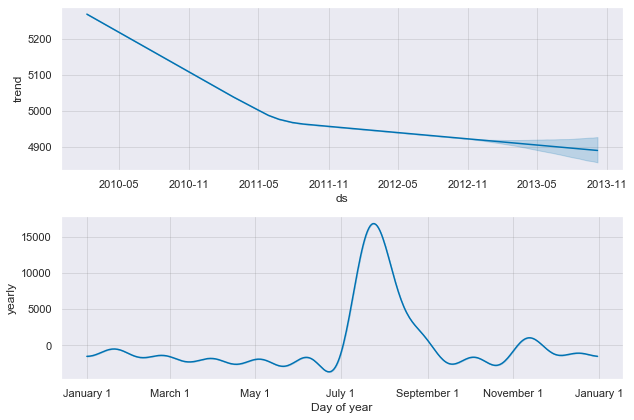

In [83]:
model.plot_components(forecast);

In [89]:
metric_df = forecast.set_index('ds')[['yhat']].join(store_10_pro_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1190.0956338021556


## Seasonality effect

A great thing about Prophet is that we can add our own custom seasonalities. Here we are going to add school holiday season that spans from early July to early September.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 720x360 with 0 Axes>

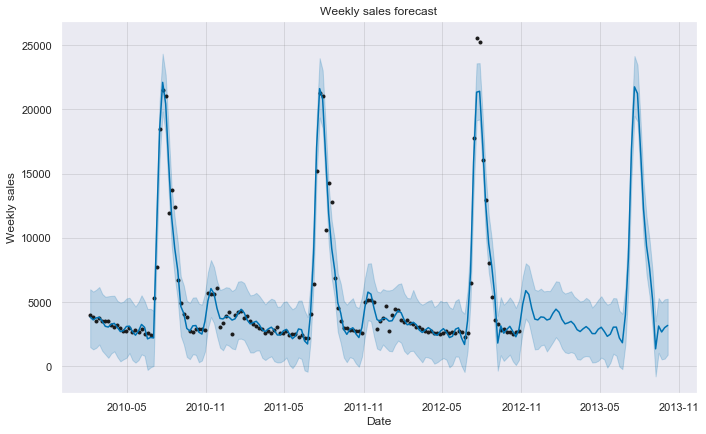

In [90]:
def is_school_holiday_season(ds):
    date = pd.to_datetime(ds)
    starts = datetime.date(date.year , 7 , 1)
    ends = datetime.date(date.year, 9 , 9)
    return starts < date.to_pydatetime().date() < ends

store_10_pro_3['school_holiday_season'] = store_10_pro_3['ds'].apply(is_school_holiday_season)
store_10_pro_3['not_school_holiday_season'] = ~store_10_pro_3['ds'].apply(is_school_holiday_season)
model = Prophet(interval_width=0.95)

model.add_seasonality(name='school_holiday_season', period=365, fourier_order=3, condition_name='school_holiday_season')
model.add_seasonality(name='not_school_holiday_season', period=365, fourier_order=3, condition_name='not_school_holiday_season')
model.fit(store_10_pro_3)

forecast = model.make_future_dataframe(periods=50, freq='W')
forecast['school_holiday_season'] = forecast['ds'].apply(is_school_holiday_season)
forecast['not_school_holiday_season'] = ~forecast['ds'].apply(is_school_holiday_season)
forecast = model.predict(forecast)

plt.figure(figsize=(10, 5))
model.plot(forecast, xlabel = 'Date', ylabel = 'Weekly sales')
plt.title('Weekly sales forecast');

In [91]:
metric_df = forecast.set_index('ds')[['yhat']].join(store_10_pro_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1127.1252945470821


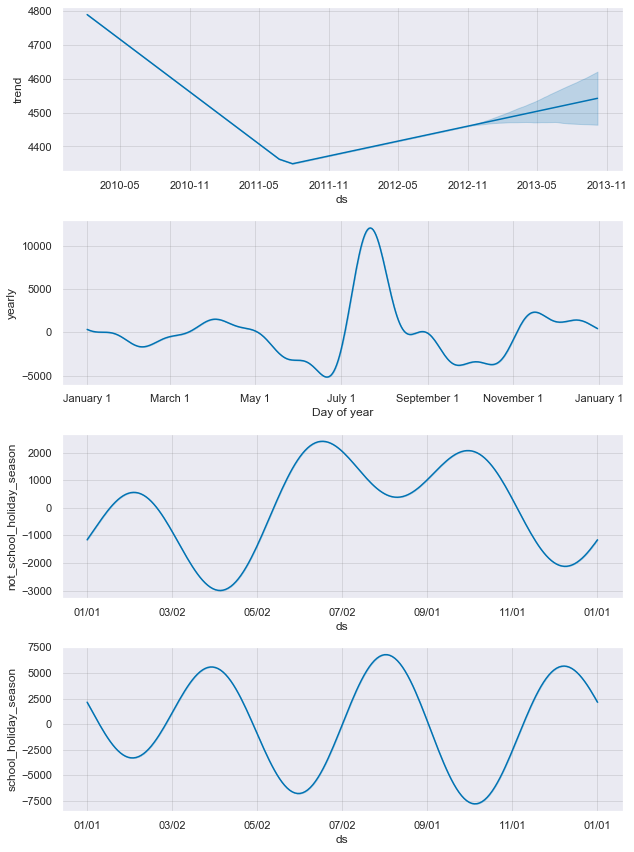

In [92]:
model.plot_components(forecast);
